In [ ]:
import pandas as pd

# Load the datasets
train = pd.read_csv('/kaggle/input/blp-2025-task-1/data/subtask_1C/blp25_hatespeech_subtask_1C_train.tsv', sep='\t')
validation = pd.read_csv('/kaggle/input/blp-2025-task-1/data/subtask_1C/blp25_hatespeech_subtask_1C_dev_test.tsv', sep='\t')
test = pd.read_csv('/kaggle/input/blp-2025-task-1/blp25_hatespeech_subtask_1C_test_with_labels.tsv', sep='\t')

# Columns to analyze
columns = ['hate_type', 'hate_severity', 'to_whom']

# Get class-wise counts
def get_class_counts(df, col):
    if col in df.columns:
        return df[col].value_counts().to_dict()
    else:
        return {'error': f'Column "{col}" not found'}

# Class-wise counts for each dataset
print("Train Dataset Class-wise Counts:")
for col in columns:
    print(f"{col}: {get_class_counts(train, col)}")

print("\nValidation Dataset Class-wise Counts:")
for col in columns:
    print(f"{col}: {get_class_counts(validation, col)}")

print("\nTest Dataset Class-wise Counts:")
for col in columns:
    print(f"{col}: {get_class_counts(test, col)}")

# Combine datasets for total word counts
all_df = pd.concat([train, validation, test], ignore_index=True)
all_df['word_count'] = all_df['text'].apply(lambda x: len(str(x).split()))

# Total words per class for each column
print("\nTotal Words Across All Datasets Per Class:")
for col in columns:
    if col in all_df.columns:
        words_per_class = all_df.groupby(col)['word_count'].sum().to_dict()
        print(f"{col}: {words_per_class}")

Train Dataset Class-wise Counts:
hate_type: {'Abusive': 8212, 'Political Hate': 4227, 'Profane': 2331, 'Religious Hate': 676, 'Sexism': 122}
hate_severity: {'Little to None': 23489, 'Mild': 6853, 'Severe': 5180}
to_whom: {'Individual': 5646, 'Organization': 3846, 'Community': 2635, 'Society': 2205}

Validation Dataset Class-wise Counts:
hate_type: {'error': 'Column "hate_type" not found'}
hate_severity: {'error': 'Column "hate_severity" not found'}
to_whom: {'error': 'Column "to_whom" not found'}

Test Dataset Class-wise Counts:
hate_type: {'Abusive': 2312, 'Political Hate': 1220, 'Profane': 709, 'Religious Hate': 179, 'Sexism': 29}
hate_severity: {'Little to None': 6737, 'Mild': 2001, 'Severe': 1462}
to_whom: {'Individual': 1571, 'Organization': 1152, 'Community': 759, 'Society': 625}

Total Words Across All Datasets Per Class:
hate_type: {'Abusive': 146296, 'Political Hate': 104233, 'Profane': 41445, 'Religious Hate': 14037, 'Sexism': 2308}
hate_severity: {'Little to None': 390634, '

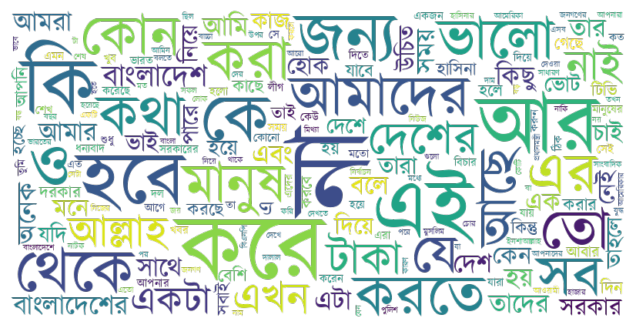

Word cloud saved as train_wordcloud.png


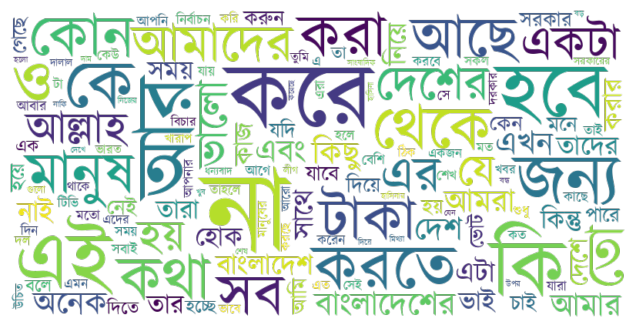

Word cloud saved as validation_wordcloud.png


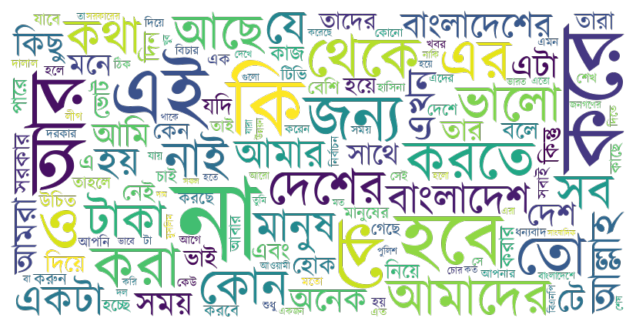

Word cloud saved as test_wordcloud.png


In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from collections import Counter
import re

# Get top 200 words
def get_top_words(text_data, n=200):
    text = " ".join(text_data)
    words = re.split(r'\s+', text.strip())
    word_counts = Counter(words)
    top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:n])
    return top_words

# Generate and save word cloud for a dataset
def generate_word_cloud(text_data, output_filename, font_path):
    word_freq = get_top_words(text_data)
    
    wordcloud = WordCloud(
        width=800,
        height=400,  # Rectangular dimensions
        background_color=None,
        mode='RGBA',  # Transparent background
        font_path=font_path,
        min_font_size=10,
        max_font_size=150,
        max_words=200,
        relative_scaling=0.5,
        collocations=False,
        regexp=r"[^\s]+",
        prefer_horizontal=0.9
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(8, 4), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.margins(0)
    plt.gca().set_frame_on(False)
    
    plt.savefig(output_filename, format='png', bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    plt.close()
    print(f"Word cloud saved as {output_filename}")

# Paths to datasets
train_file = '/kaggle/input/blp-2025-task-1/data/subtask_1C/blp25_hatespeech_subtask_1C_train.tsv'
val_file = '/kaggle/input/blp-2025-task-1/data/subtask_1C/blp25_hatespeech_subtask_1C_dev.tsv'
test_file = '/kaggle/input/blp-2025-task-1/blp25_hatespeech_subtask_1C_test_with_labels.tsv'

# Bengali font
font_path = '/kaggle/input/blp-2025-task-1/kalpurush.ttf'

if not os.path.exists(font_path):
    raise FileNotFoundError("Please provide a valid path to a Bengali font file (e.g., Kalpurush.ttf)")

# Load datasets
try:
    train_df = pd.read_csv(train_file, sep='\t')
    val_df = pd.read_csv(val_file, sep='\t')
    test_df = pd.read_csv(test_file, sep='\t')
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Verify required column exists or not
required_column = 'text'
for df, name in [(train_df, 'train'), (val_df, 'validation'), (test_df, 'test')]:
    if required_column not in df.columns:
        print(f"Error: '{required_column}' column not found in {name} dataset")
        exit()

# Generate word clouds
generate_word_cloud(train_df['text'].dropna(), 'train_wordcloud.png', font_path)
generate_word_cloud(val_df['text'].dropna(), 'validation_wordcloud.png', font_path)
generate_word_cloud(test_df['text'].dropna(), 'test_wordcloud.png', font_path)

In [ ]:
import pandas as pd

# Load the datasets
try:
    train = pd.read_csv('/kaggle/input/blp-2025-task-1/data/subtask_1C/blp25_hatespeech_subtask_1C_train.tsv', sep='\t')
    validation = pd.read_csv('/kaggle/input/blp-2025-task-1/data/subtask_1C/blp25_hatespeech_subtask_1C_dev.tsv', sep='\t')
    test = pd.read_csv('/kaggle/input/blp-2025-task-1/blp25_hatespeech_subtask_1C_test_with_labels.tsv', sep='\t')
except FileNotFoundError as e:
    print(f"Error: File not found - {e}")
    exit()

# Add word count column to each dataset
train['word_count'] = train['text'].apply(lambda x: len(str(x).split()))
validation['word_count'] = validation['text'].apply(lambda x: len(str(x).split()))
test['word_count'] = test['text'].apply(lambda x: len(str(x).split()))

# Columns to analyze
columns = ['hate_type', 'hate_severity', 'to_whom']

# Function to compute word counts per class
def get_word_counts(df, col):
    if col in df.columns:
        return df.groupby(col)['word_count'].sum().to_dict()
    else:
        return {'error': f'Column "{col}" not found'}

# Print word counts for each dataset
print("Train Dataset Word Counts Per Class:")
for col in columns:
    print(f"{col}: {get_word_counts(train, col)}")

print("\nValidation Dataset Word Counts Per Class:")
for col in columns:
    print(f"{col}: {get_word_counts(validation, col)}")

print("\nTest Dataset Word Counts Per Class:")
for col in columns:
    print(f"{col}: {get_word_counts(test, col)}")

# Combine datasets for total word counts across all datasets
all_df = pd.concat([train, validation, test], ignore_index=True)
print("\nTotal Word Counts Across All Datasets Per Class:")
for col in columns:
    if col in all_df.columns:
        words_per_class = all_df.groupby(col)['word_count'].sum().to_dict()
        print(f"{col}: {words_per_class}")
    else:
        print(f"{col}: Column not found in datasets")

Train Dataset Word Counts Per Class:
hate_type: {'Abusive': 114628, 'Political Hate': 81124, 'Profane': 31974, 'Religious Hate': 11183, 'Sexism': 1992}
hate_severity: {'Little to None': 303763, 'Mild': 107779, 'Severe': 77402}
to_whom: {'Community': 44497, 'Individual': 77494, 'Organization': 60872, 'Society': 39197}

Validation Dataset Word Counts Per Class:
hate_type: {'Abusive': 7573, 'Political Hate': 5214, 'Profane': 2173, 'Religious Hate': 622, 'Sexism': 88}
hate_severity: {'Little to None': 24005, 'Mild': 7139, 'Severe': 4831}
to_whom: {'Community': 2913, 'Individual': 4874, 'Organization': 4389, 'Society': 2348}

Test Dataset Word Counts Per Class:
hate_type: {'Abusive': 31668, 'Political Hate': 23109, 'Profane': 9471, 'Religious Hate': 2854, 'Sexism': 316}
hate_severity: {'Little to None': 86871, 'Mild': 32002, 'Severe': 21804}
to_whom: {'Community': 12390, 'Individual': 20403, 'Organization': 19512, 'Society': 10587}

Total Word Counts Across All Datasets Per Class:
hate_type